In [1]:
import numpy as np
import os
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.config import ExportFormat
from tflite_model_maker import model_spec
from tflite_model_maker import object_detector
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

import tensorflow as tf
assert tf.__version__.startswith('2')

tf.get_logger().setLevel('ERROR')
from absl import logging
logging.set_verbosity(logging.ERROR)

In [2]:
from glob import glob
from keras_preprocessing.image import ImageDataGenerator


In [15]:
base_dir = glob('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\이미지학습용데이터\\*')
test_dir = glob('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\이미지학습용데이터\\*')[0]
validation_dir = glob('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\이미지학습용데이터\\*')[2]
train_dir = glob('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\이미지학습용데이터\\*')[1]


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)


# training_datagen = ImageDataGenerator(rescale = 1./255, rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')

# train_generator = training_datagen.flow_from_directory(train_dir,target_size=(150,150),class_mode='categorical',batch_size=150)

# test_generator = test_datagen.flow_from_directory(test_dir,target_size= (150,150),batch_size=150,class_mode='categorical')

# validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),class_mode='categorical',batch_size=150)


In [16]:

train_generator = training_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
# class_mode='categorical',
batch_size=150
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size= (150,150),
    batch_size=150,
    # class_mode='categorical'
)


validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
# class_mode='categorical',
batch_size=150
)

Found 6070 images belonging to 15 classes.
Found 2037 images belonging to 15 classes.
Found 2018 images belonging to 15 classes.


In [33]:
data = DataLoader.from_folder('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\imageorginal\\')
train_data_all, test_data = data.split(0.8)
train_data, valid_data = train_data_all.split(0.75)

In [ ]:
data = DataLoader.from_folder('C:\\workspace\\eatand_medicinal_plant\\학습용데이터\\01.원천데이터\\imageorginal\\')

In [3]:
from glob import glob

In [4]:
test_dir = glob('C:\workspace\eatand_medicinal_plant\\testdata\\220121testdata\\*\\*\\*\\*\\*.jpg')

In [12]:
glob('C:\workspace\eatand_medicinal_plant\\testdata\\220121testdata\\*\\*\\*\\*\\*.jpg')[0]

'C:\\workspace\\eatand_medicinal_plant\\testdata\\220121testdata\\01.원천데이터\\식의약용 자생식물 분석 데이터\\02\\009\\CR009_02_50061b.jpg'

In [7]:
from keras.models import load_model
# loadmodel = load_model('image1.h5')

In [8]:
model_image = load_model('C:\workspace\\eatand_medicinal_plant\\이미지러닝\\image1.h5')
model_image.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model_image.predict(test_dir)

In [6]:
test_dir[0]

'C:\\workspace\\eatand_medicinal_plant\\testdata\\220121testdata\\01.원천데이터\\식의약용 자생식물 분석 데이터\\02\\009\\CR009_02_50061b.jpg'

In [ ]:
model = image_classifier.create(train_data)


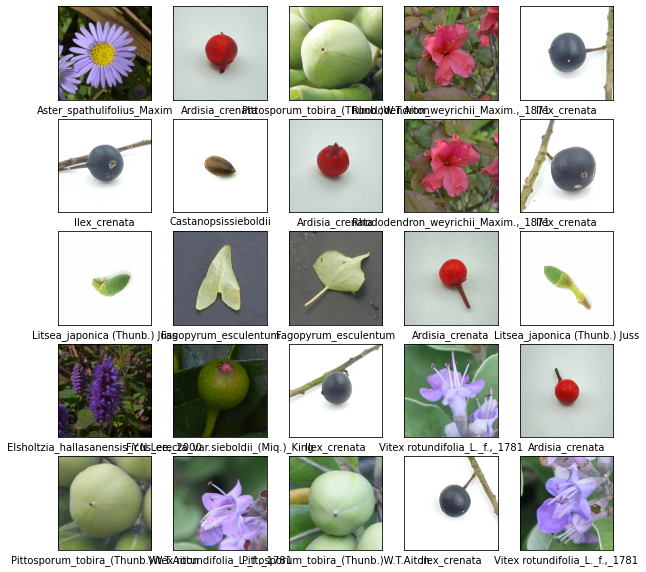

In [25]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

In [29]:
model = image_classifier.create(train_data, validation_data=valid_data)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 15)                19215     
                                                                 
Total params: 3,432,239
Trainable params: 19,215
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
189/189 [==============================] - 213s 1s/step - loss: 0.8612 - accuracy: 0.9220 - val_loss: 0.6254 - val_accuracy: 0.9970
Epoch 2/5
189/189 [==============================] - 218s 1s/step - loss: 0.6341 - accurac

In [30]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_3 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 dense_3 (Dense)             (None, 15)                19215     
                                                                 
Total params: 3,432,239
Trainable params: 19,215
Non-trainable params: 3,413,024
_________________________________________________________________


In [ ]:
loss, accuracy = model.evaluate(test_data)


In [ ]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [ ]:
model.export(export_dir='.')
